# Homework 2
### Adishree sane, adsane@syr.edu, 702207239

In [16]:
#Task1
import networkx as nx
import matplotlib.pyplot as plt
import os
file_path = "email_net.txt"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please upload the file again.")


In [18]:
#Task2
def load_directed_multigraph(file_path):
    G = nx.MultiDiGraph()  
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                sender, receiver = parts[:2]  
                G.add_edge(str(sender), str(receiver))  
    return G

# Print basic stats
print(f"Number of Nodes: {email_multigraph.number_of_nodes()}")
print(f"Number of Edges: {email_multigraph.number_of_edges()}")


Number of Nodes: 140
Number of Edges: 31179


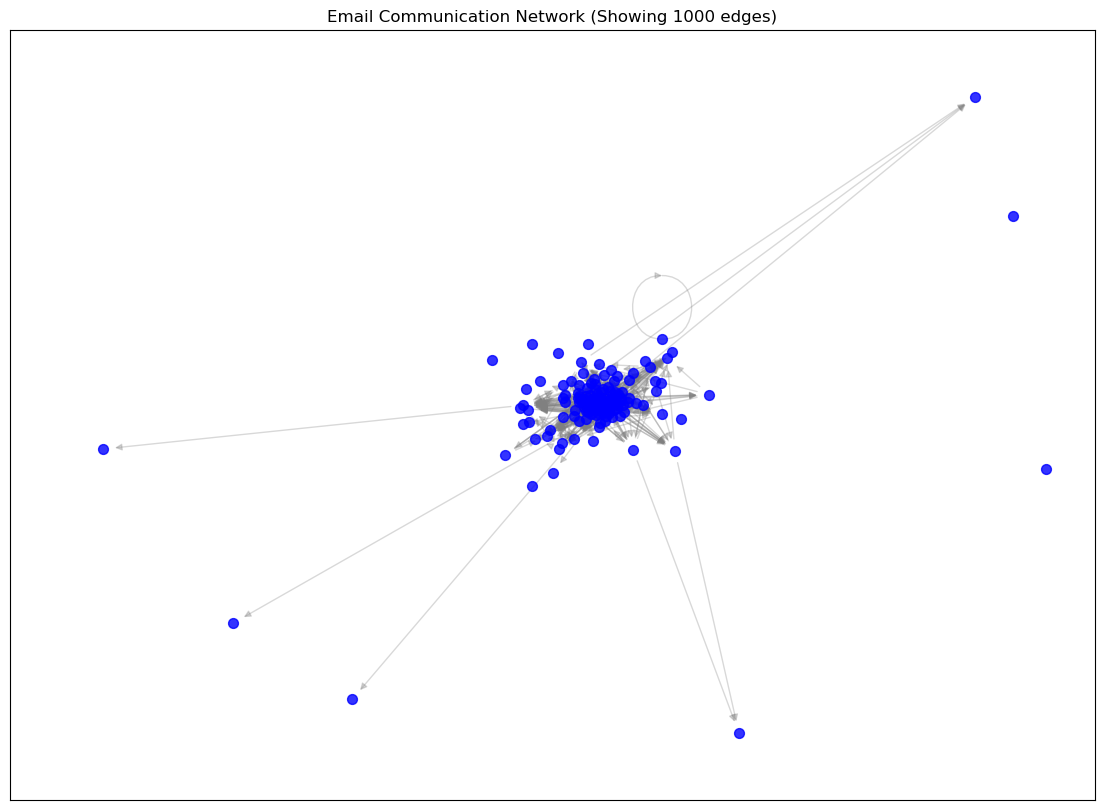

In [28]:
#Task3
#taking max edges as 1000 because the graph visualization might get messy
import random
def draw_email_network(G, max_edges=1000):
   
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42)  
    
    edges = list(G.edges())
    if len(edges) > max_edges:
        sampled_edges = random.sample(edges, max_edges)
    else:
        sampled_edges = edges

    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=sampled_edges, edge_color='gray', alpha=0.3)

    plt.title(f"Email Communication Network (Showing {len(sampled_edges)} edges)")
    plt.show()

email_graph = nx.DiGraph(email_multigraph)
draw_email_network(email_graph)


In [30]:
# Task 4
def get_graph_size(G):
    return G.number_of_nodes(), G.number_of_edges()

num_nodes, num_edges = get_graph_size(email_graph)
print(f"Number of Employees (Nodes): {num_nodes}, Number of Emails (Edges): {num_edges}")

Number of Employees (Nodes): 140, Number of Emails (Edges): 3218


In [32]:
# Task 5
def check_connectivity(G):
    return nx.is_strongly_connected(G), nx.is_weakly_connected(G)

strongly_connected, weakly_connected = check_connectivity(email_graph)
print(f"Strongly Connected: {strongly_connected}, Weakly Connected: {weakly_connected}")


Strongly Connected: False, Weakly Connected: True


In [36]:
# Task 6
def largest_weakly_connected_component_size(G):
    if nx.is_weakly_connected(G):
        return G.number_of_nodes()
    else:
        return max(len(c) for c in nx.weakly_connected_components(G))

largest_weakly_component = largest_weakly_connected_component_size(email_graph)
print(f"Largest Weakly Connected Component Size: {largest_weakly_component}")


Largest Weakly Connected Component Size: 140


In [38]:
# Task 7
def largest_strongly_connected_component_size(G):
    return max(len(c) for c in nx.strongly_connected_components(G))

largest_strongly_component = largest_strongly_connected_component_size(email_graph)
print(f"Largest Strongly Connected Component Size: {largest_strongly_component}")


Largest Strongly Connected Component Size: 120


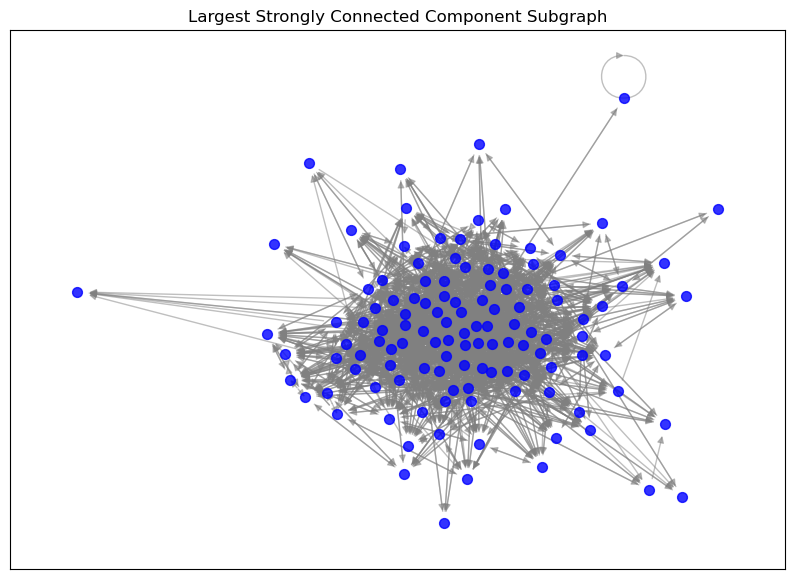

Largest SCC Subgraph - Nodes: 120
Largest SCC Subgraph - Edges: 3182


In [54]:
# Task 8
Graph_sub = get_largest_strongly_connected_subgraph(email_graph)
def draw_largest_scc(Graph_sub):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(Graph_sub, seed=42)  

    nx.draw_networkx_nodes(Graph_sub, pos, node_size=50, node_color='blue', alpha=0.8)
    nx.draw_networkx_edges(Graph_sub, pos, edge_color='grey', alpha=0.5)

    plt.title("Largest Strongly Connected Subgraph")
    plt.show()

draw_largest_scc(Graph_sub)
print(f"Largest SCC Subgraph - Nodes: {Graph_sub.number_of_nodes()}")
print(f"Largest SCC Subgraph - Edges: {Graph_sub.number_of_edges()}")

In [44]:
# Task 9
def average_shortest_path_length(G):
    if nx.is_strongly_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        return fl at('inf')

avg_shortest_path_length = average_shortest_path_length(largest_scc_subgraph)
print(f"Average Shortest Path Length in Largest SCC: {avg_shortest_path_length}")

Average Shortest Path Length in Largest SCC: 1.8405462184873949


In [46]:
# Task 10
def largest_scc_diameter(G):
    if nx.is_strongly_connected(G):
        return nx.diameter(G)
    else:
        return float('inf')

largest_scc_diameter_value = largest_scc_diameter(largest_scc_subgraph)
print(f"Diameter of Largest SCC: {largest_scc_diameter_value}")

Diameter of Largest SCC: 4
